# TASK #1: PROJECT OVERVIEW 


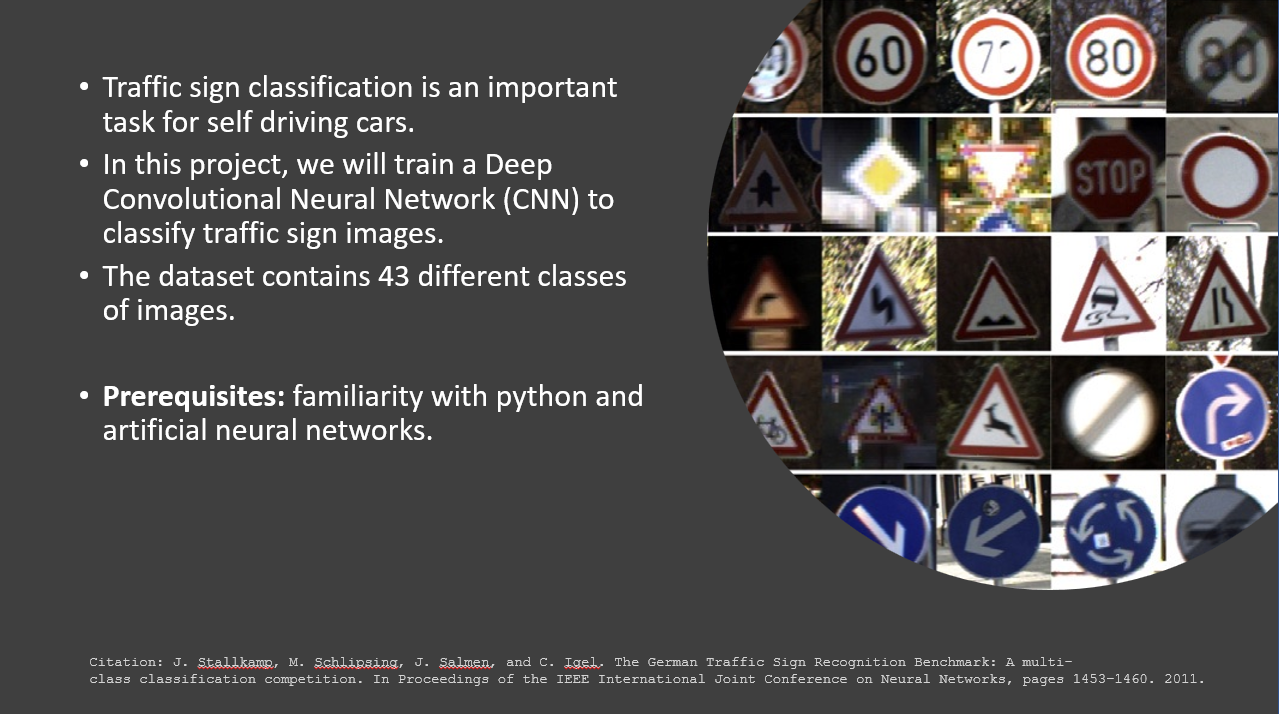

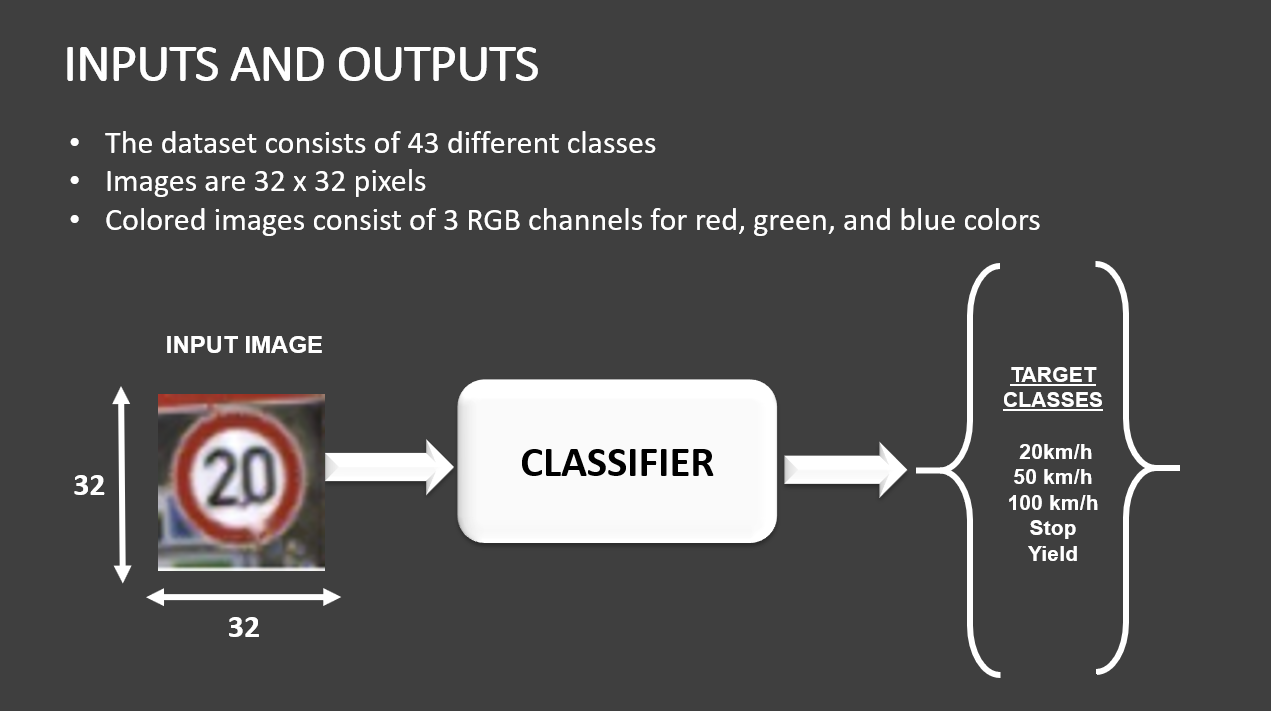

# TASK #2: IMPORT LIBRARIES/DATASETS

In [49]:
import matplotlib.pyplot as plt #for data vitualization
import numpy as np
import tensorflow as tf
import pandas as pd  #data frame manipulation
import seaborn as sns #data vitualization
import pickle  #load data
import random  #for genarate random numbers

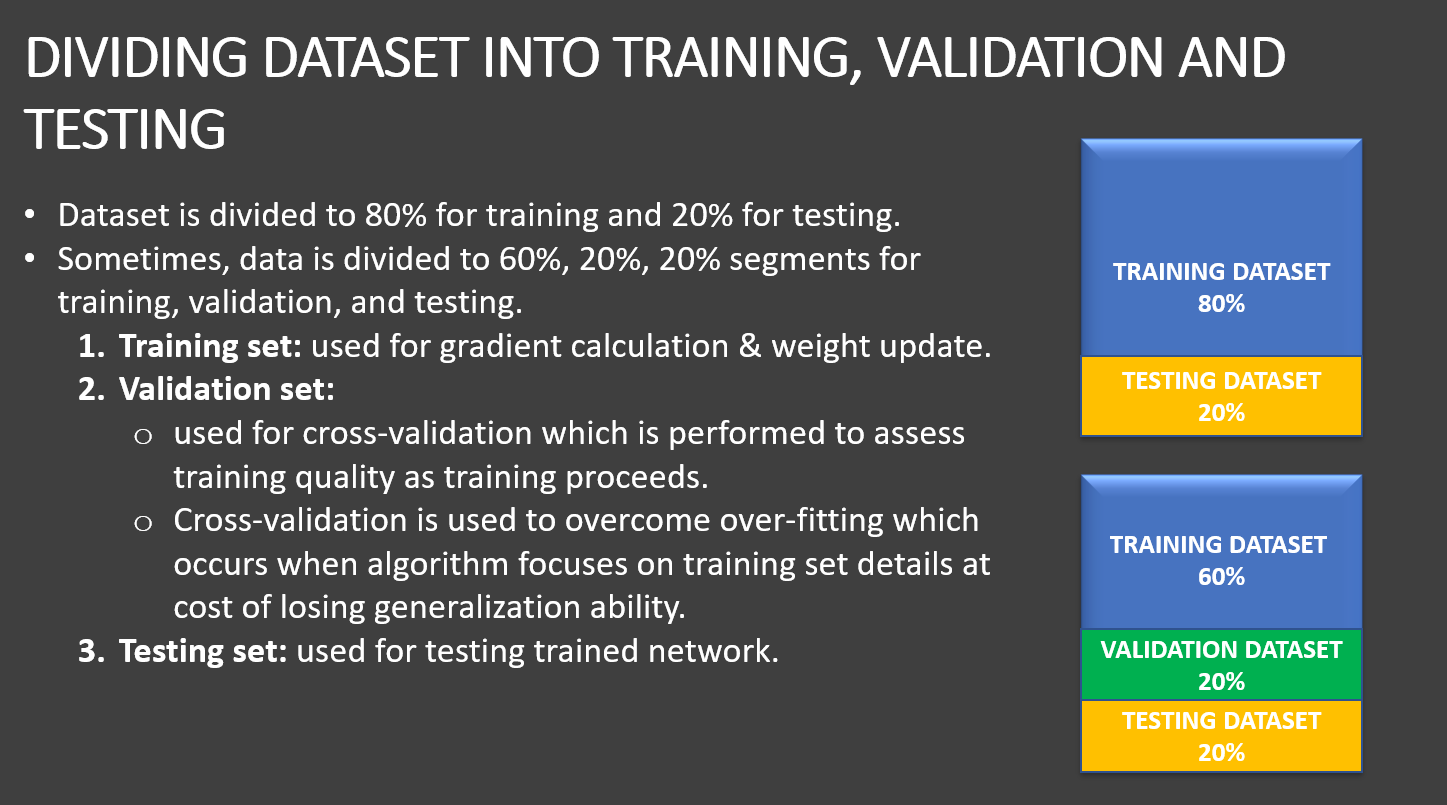

In [50]:
with open("./traffic-signs-data/train.p", mode='rb') as training_data:
    train = pickle.load(training_data)#mode as read binary mode
with open("./traffic-signs-data/valid.p", mode='rb') as validation_data:
    valid = pickle.load(validation_data)
with open("./traffic-signs-data/test.p", mode='rb') as testing_data:
    test = pickle.load(testing_data)

In [51]:
x_train,y_train = train['features'],train['labels']
x_valid,y_valid = valid['features'],valid['labels']
x_test,y_test = test['features'],test['labels']

In [52]:
x_train.shape


(34799, 32, 32, 3)

In [53]:
x_valid.shape


(4410, 32, 32, 3)

In [54]:

x_test.shape

(12630, 32, 32, 3)

# TASK #3: PERFORM IMAGES VISUALIZATION

8

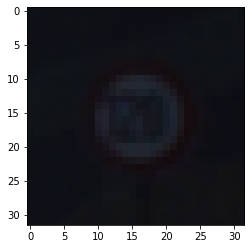

In [55]:
i = np.random.randint(1, len(x_train))
plt.imshow(x_train[i])
y_train[i]

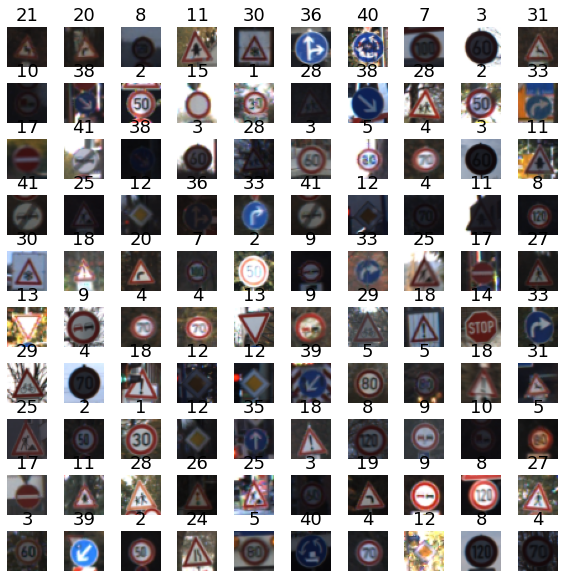

In [56]:
# Let's view more images in a grid format
# Define the dimensions of the plot grid 
#10*10=100 images
W_grid = 10
L_grid = 10

# fig, axes = plt.subplots(L_grid, W_grid)
# subplot return the figure object and axes object
# we can use the axes object to plot specific figures at various locations

fig, axes = plt.subplots(L_grid, W_grid, figsize = (10,10))

axes = axes.ravel() # flaten the 5 x 5 matrix into 25 array

n_training = len(x_train) # get the length of the training dataset

# Select a random number from 0 to n_training
# create evenly spaces variables 
for i in np.arange(0,W_grid*L_grid):
    
    # Select a random number 
    index=np.random.randint(0,n_training) # len(x_train)
    # read and display an image with the selected index 
    axes[i].imshow(x_train[index])
    axes[i].set_title(y_train[index], fontsize = 18)
    axes[i].axis('off')
    
plt.subplots_adjust(hspace = 0.4) #spaces between 2 images
    

        

# TASK #4: CONVERT IMAGES TO GRAYSCALE AND PERFORM NORMALIZATION

In [57]:
#suffle data
from sklearn.utils import shuffle
x_train, y_train = shuffle(x_train, y_train)

#machine does not know order


In [58]:
#covert to image to gray scale
x_train_gray = np.sum(x_train/3,axis = 3,keepdims=True)

In [59]:
x_train_gray.shape
#now dimension is 1
#one single channel

(34799, 32, 32, 1)

In [60]:
x_train_gray_norm = (x_train_gray-128)/128

In [61]:
x_train_gray_norm

array([[[[-0.59635417],
         [-0.48697917],
         [-0.3984375 ],
         ...,
         [-0.78385417],
         [-0.53645833],
         [-0.41927083]],

        [[-0.66145833],
         [-0.60677083],
         [-0.57552083],
         ...,
         [-0.80208333],
         [-0.54166667],
         [-0.453125  ]],

        [[-0.6015625 ],
         [-0.64583333],
         [-0.6796875 ],
         ...,
         [-0.8125    ],
         [-0.6171875 ],
         [-0.4609375 ]],

        ...,

        [[-0.78125   ],
         [-0.84635417],
         [-0.7265625 ],
         ...,
         [-0.73177083],
         [-0.78385417],
         [-0.84114583]],

        [[-0.77083333],
         [-0.76302083],
         [-0.69010417],
         ...,
         [-0.73697917],
         [-0.7734375 ],
         [-0.82291667]],

        [[-0.75520833],
         [-0.7421875 ],
         [-0.703125  ],
         ...,
         [-0.7421875 ],
         [-0.78125   ],
         [-0.82291667]]],


       [[[-0.5859375 ],


In [92]:
x_test_gray = np.sum(x_test/3,axis = 3,keepdims=True)
x_test_gray_norm=(x_test_gray-128)/128 #normalization
x_test_gray_norm

array([[[[ 0.1171875 ],
         [ 0.10416667],
         [ 0.11458333],
         ...,
         [-0.07552083],
         [-0.04947917],
         [-0.16666667]],

        [[ 0.12760417],
         [ 0.1171875 ],
         [ 0.12760417],
         ...,
         [ 0.140625  ],
         [ 0.13020833],
         [ 0.11979167]],

        [[ 0.125     ],
         [ 0.13020833],
         [ 0.109375  ],
         ...,
         [ 0.15364583],
         [ 0.15885417],
         [ 0.14583333]],

        ...,

        [[ 0.09635417],
         [ 0.07552083],
         [ 0.08333333],
         ...,
         [ 0.09635417],
         [ 0.09375   ],
         [ 0.1171875 ]],

        [[ 0.08854167],
         [ 0.08333333],
         [ 0.06770833],
         ...,
         [ 0.08072917],
         [ 0.08854167],
         [ 0.09635417]],

        [[ 0.078125  ],
         [ 0.06510417],
         [ 0.09114583],
         ...,
         [ 0.09375   ],
         [ 0.09895833],
         [ 0.10416667]]],


       [[[-0.50520833],


In [63]:
x_valid_gray = np.sum(x_valid/3,axis = 3,keepdims=True)
x_valid_gray_norm=(x_valid_gray-128)/128
x_valid_gray_norm

array([[[[-0.90364583],
         [-0.90885417],
         [-0.90885417],
         ...,
         [-0.90364583],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90364583],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        [[-0.90104167],
         [-0.90885417],
         [-0.90625   ],
         ...,
         [-0.90625   ],
         [-0.90625   ],
         [-0.90885417]],

        ...,

        [[-0.88020833],
         [-0.88802083],
         [-0.8828125 ],
         ...,
         [-0.90364583],
         [-0.89583333],
         [-0.89583333]],

        [[-0.86979167],
         [-0.87760417],
         [-0.86979167],
         ...,
         [-0.91145833],
         [-0.90364583],
         [-0.89583333]],

        [[-0.86197917],
         [-0.86979167],
         [-0.86197917],
         ...,
         [-0.90625   ],
         [-0.8984375 ],
         [-0.88802083]]],


       [[[-0.90104167],


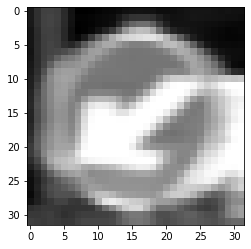

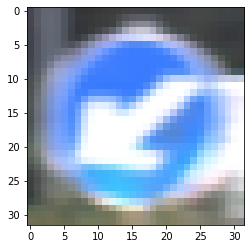

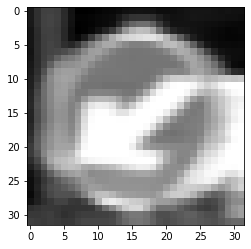

In [64]:
i = random.randint(1, len(x_train_gray))
plt.imshow(x_train_gray[i].squeeze(), cmap = 'gray') #gray scale
plt.figure()
plt.imshow(x_train[i])#with colour
plt.figure()
plt.imshow(x_train_gray_norm[i].squeeze(), cmap = 'gray')#normalization pic

# TASK #5: UNDERSTAND THE THEORY AND INTUITION BEHIND CONVOLUTIONAL NEURAL NETWORKS 

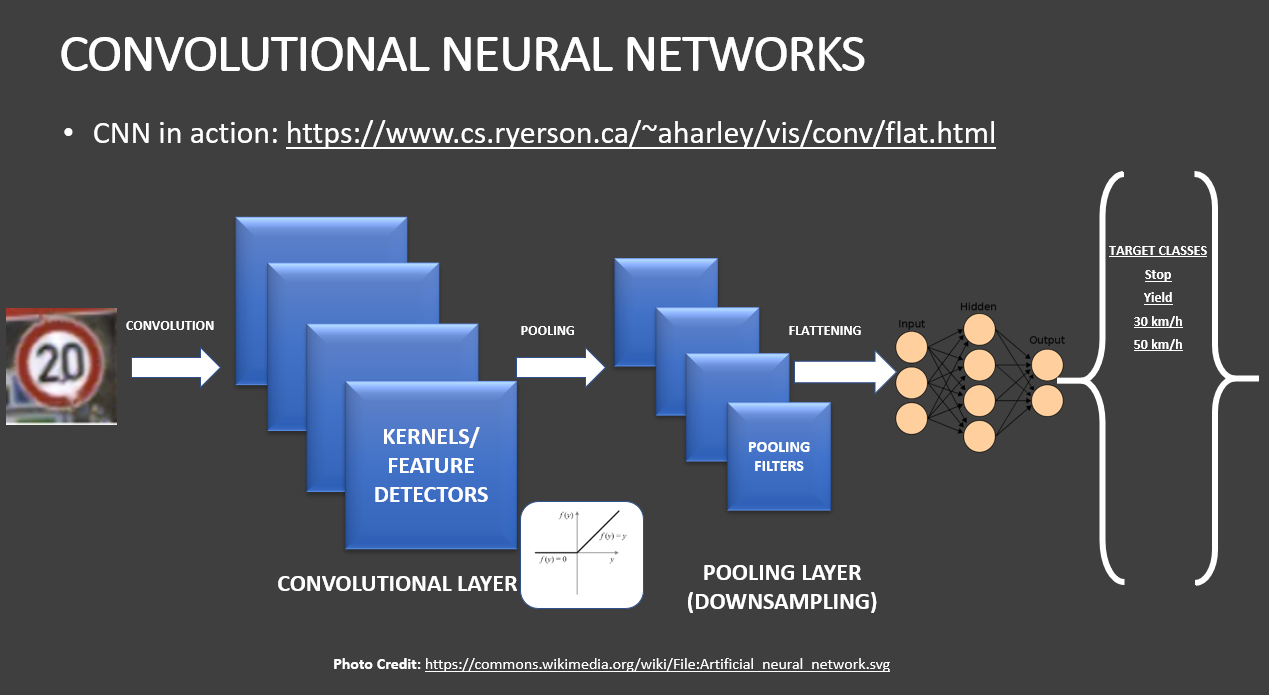

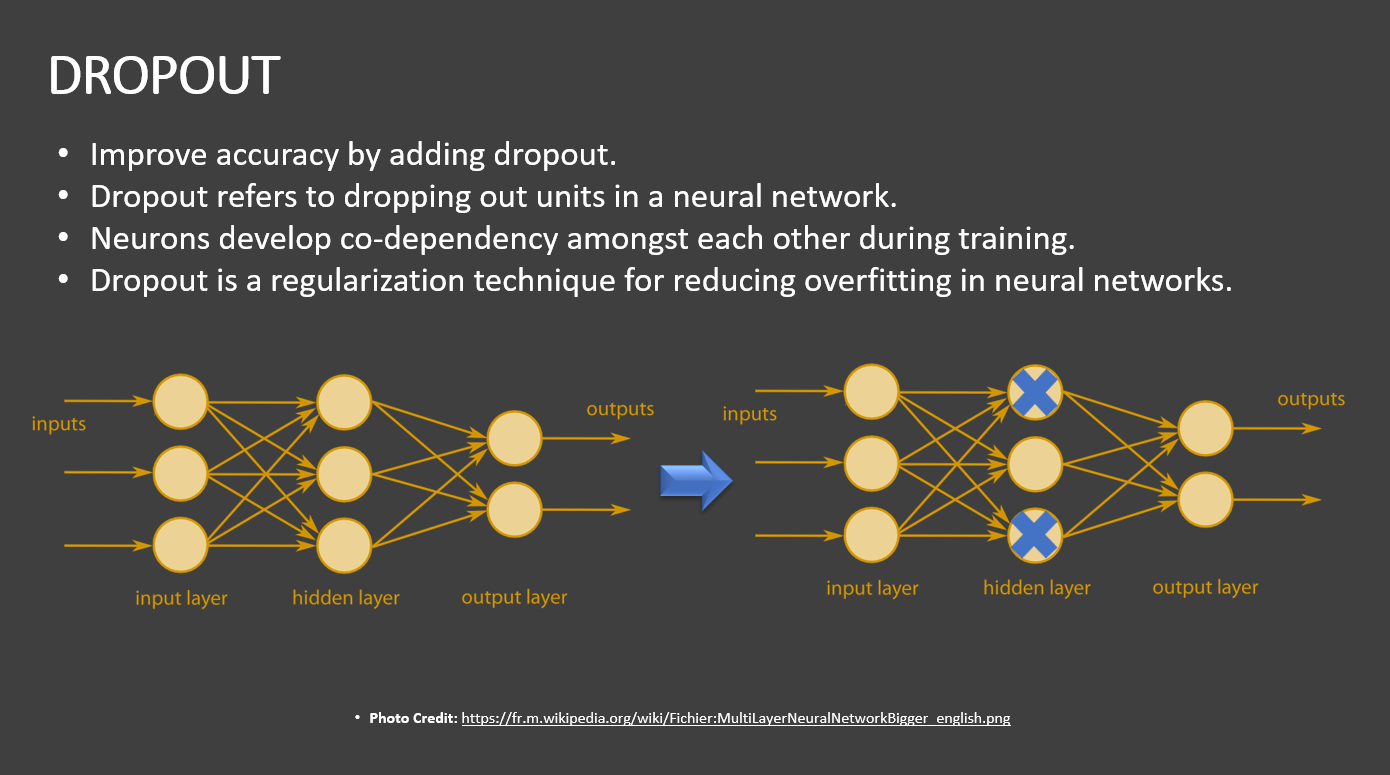

# TASK #6: BUILD DEEP CONVOLUTIONAL NEURAL NETWORK MODEL

In [65]:
from tensorflow.keras import datasets, layers, models
CNN  = models.Sequential()
CNN.add(layers.Conv2D(6,(5,5),activation='relu',input_shape = (32,32,1))) #6 convoltions
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Flatten())

CNN.add(layers.Dense(120,activation = 'relu'))
CNN.add(layers.Dense(84,activation = 'relu'))
CNN.add(layers.Dense(43,activation = 'softmax'))
CNN.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_8 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 1176)              0         
_________________________________________________________________
dense_15 (Dense)             (None, 120)               141240    
_________________________________________________________________
dense_16 (Dense)             (None, 84)                10164     
_________________________________________________________________
dense_17 (Dense)             (None, 43)                3655      
Total params: 155,215
Trainable params: 155,215
Non-trainable params: 0
________________________________________________

In [66]:
from tensorflow.keras import datasets, layers, models
CNN  = models.Sequential()
CNN.add(layers.Conv2D(6,(5,5),activation='relu',input_shape = (32,32,1))) #6 convoltions
CNN.add(layers.AveragePooling2D())

CNN.add(layers.Dropout(0.2)) #20% present

CNN.add(layers.Conv2D(16,(5,5),activation='relu',input_shape = (32,32,1))) #6 convoltions
CNN.add(layers.AveragePooling2D())



CNN.add(layers.Flatten())

CNN.add(layers.Dense(120,activation = 'relu'))
CNN.add(layers.Dense(84,activation = 'relu'))
CNN.add(layers.Dense(43,activation = 'softmax'))
CNN.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 28, 28, 6)         156       
_________________________________________________________________
average_pooling2d_9 (Average (None, 14, 14, 6)         0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 14, 14, 6)         0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 10, 10, 16)        2416      
_________________________________________________________________
average_pooling2d_10 (Averag (None, 5, 5, 16)          0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 400)               0         
_________________________________________________________________
dense_18 (Dense)             (None, 120)             

# TASK #7: COMPILE AND TRAIN DEEP CNN MODEL

In [67]:
CNN.compile(optimizer = 'Adam',
            loss = 'sparse_categorical_crossentropy',
            metrics = ['accuracy'])
# since more than 2 clasess(43) we use loss funtion as sparse_categorical_crossentropy

In [68]:
history = CNN.fit(x_train_gray_norm,
                  y_train,
                  batch_size=500,
                  epochs=5,
                  verbose=1, 
                  validation_data=(x_valid_gray_norm, y_valid))


Epoch 1/5
70/70 [==============================] - 14s 174ms/step - loss: 3.2094 - accuracy: 0.1664 - val_loss: 2.6862 - val_accuracy: 0.3070
Epoch 2/5
70/70 [==============================] - 12s 178ms/step - loss: 1.7678 - accuracy: 0.5107 - val_loss: 1.3601 - val_accuracy: 0.6066
Epoch 3/5
70/70 [==============================] - 13s 193ms/step - loss: 1.0760 - accuracy: 0.6883 - val_loss: 0.9585 - val_accuracy: 0.7163
Epoch 4/5
70/70 [==============================] - 14s 197ms/step - loss: 0.8229 - accuracy: 0.7613 - val_loss: 0.7978 - val_accuracy: 0.7655
Epoch 5/5
70/70 [==============================] - 14s 201ms/step - loss: 0.6789 - accuracy: 0.8077 - val_loss: 0.6825 - val_accuracy: 0.8020


# TASK #8: ASSESS TRAINED CNN MODEL PERFORMANCE 

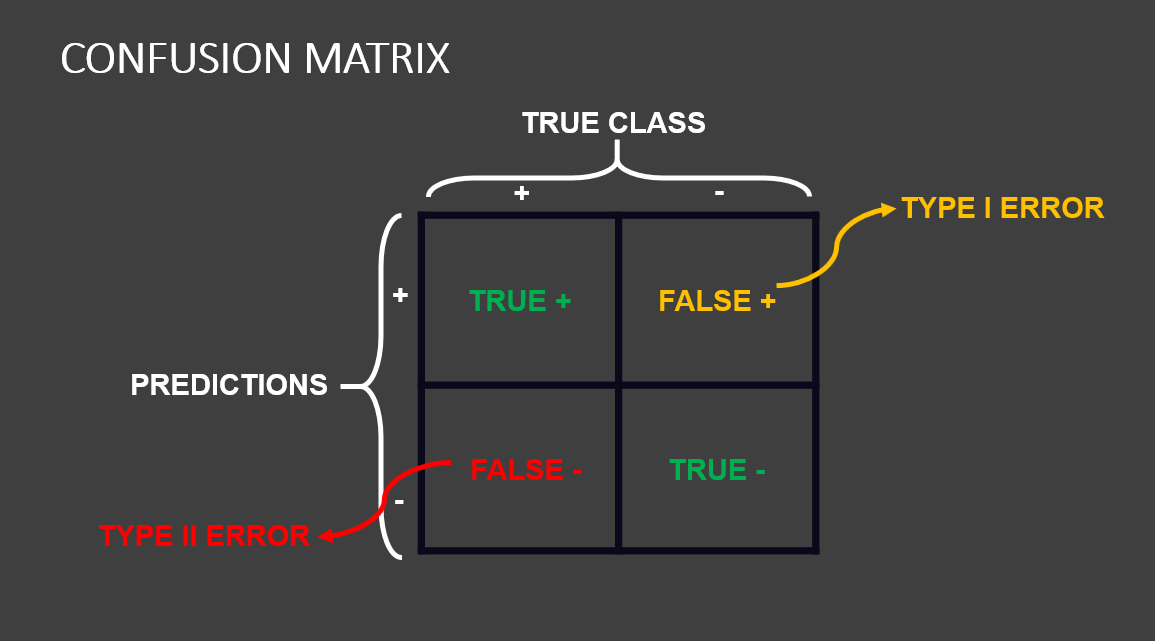

In [83]:
score = CNN.evaluate(x_test_gray_norm, y_test)
print('Test Accuracy: {}'.format(score[1]))

395/395 [==============================] - 3s 9ms/step - loss: 0.9399 - accuracy: 0.7807
Test Accuracy: 0.7806808948516846


In [84]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [85]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

Text(0.5, 1.0, 'Traing and Validation loss')

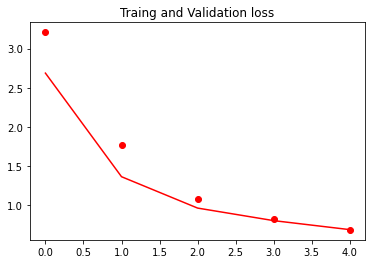

In [86]:
epochs  = range(len(accuracy))
plt.plot(epochs,loss,'ro',label='Training loss')#ro red circule

plt.plot(epochs,val_loss,'r',label='Validation loss ')
plt.title('Traing and Validation loss')

Text(0.5, 1.0, 'Traing and Validation accuracy')

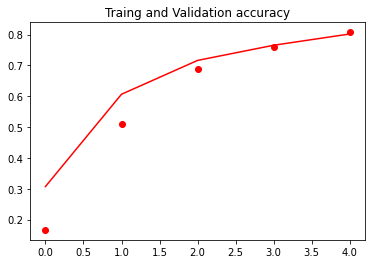

In [87]:
epochs  = range(len(accuracy))
plt.plot(epochs,accuracy,'ro',label='Training accuracy')#ro red circule

plt.plot(epochs,val_accuracy,'r',label='Validation accuracy ')
plt.title('Traing and Validation accuracy')

In [96]:
predicted_classes = CNN.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

AttributeError: 'Sequential' object has no attribute 'predict_classes'

<AxesSubplot:>

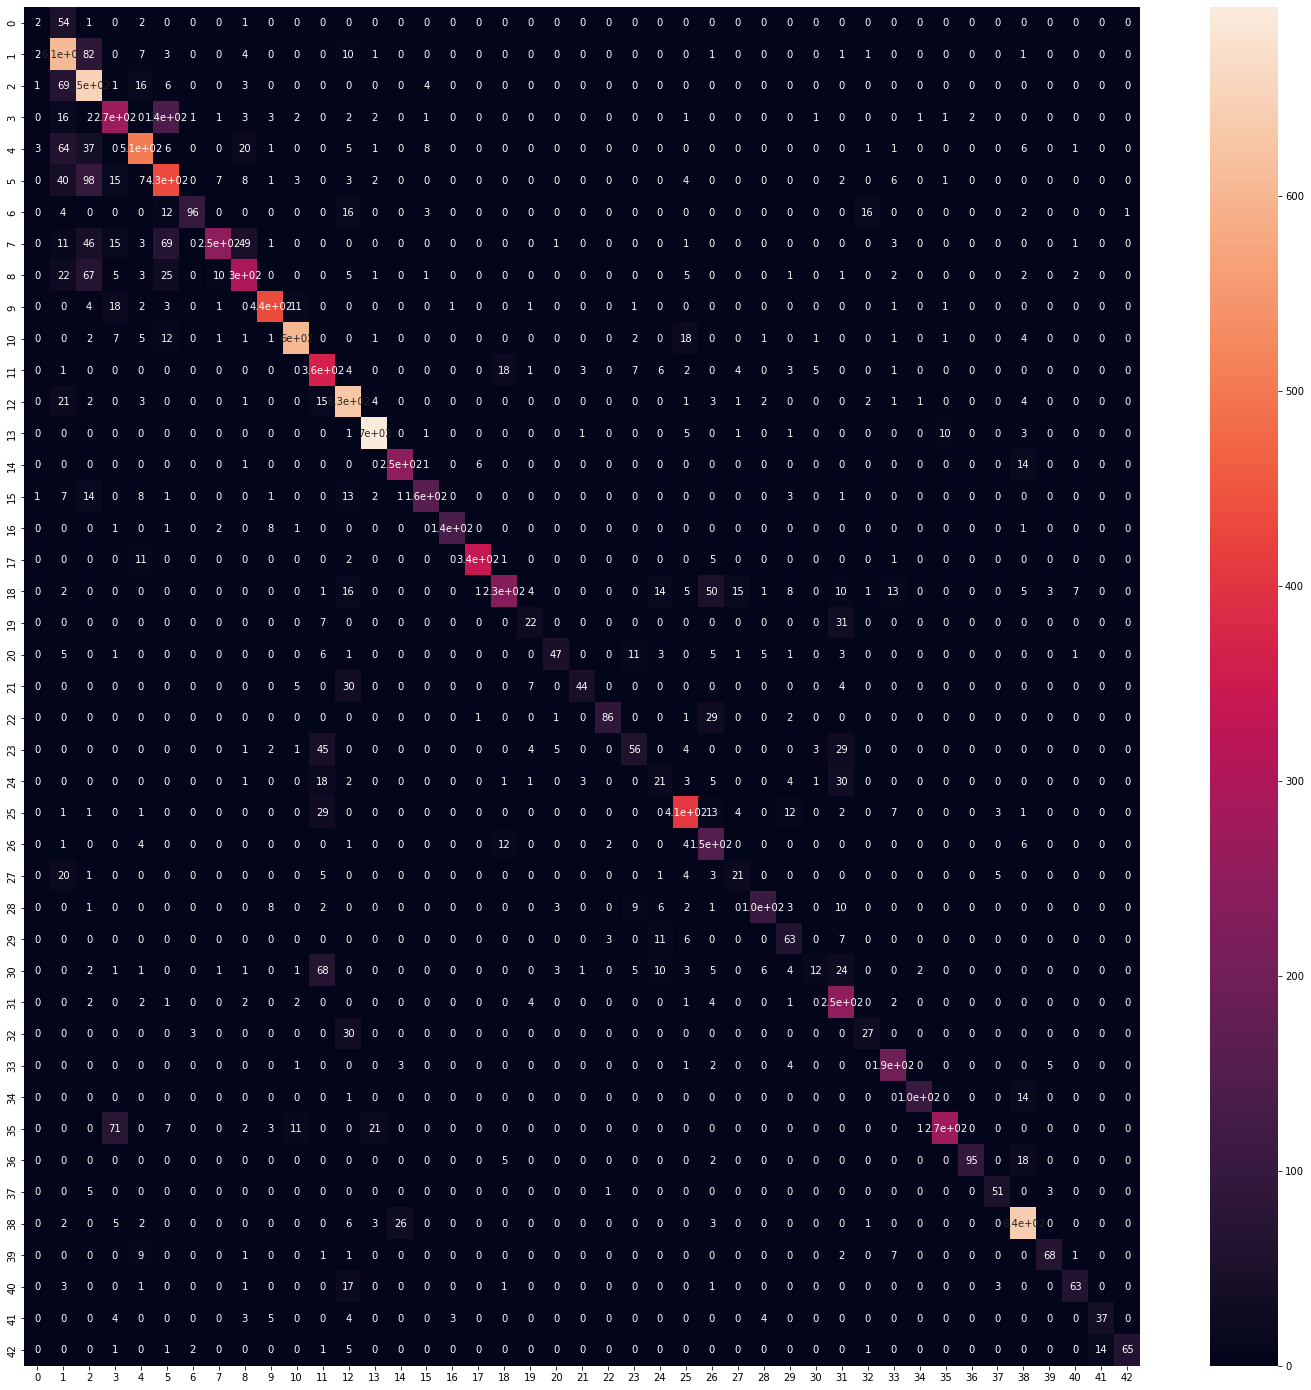

In [95]:
predicted_probabilities = CNN.predict(x_test_gray_norm)
predicted_classes = predicted_probabilities.argmax(axis=1)


#predicted_classes = CNN.predict_classes(x_test_gray_norm)
y_true = y_test

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_true, predicted_classes)
plt.figure(figsize = (25, 25))
sns.heatmap(cm, annot = True)

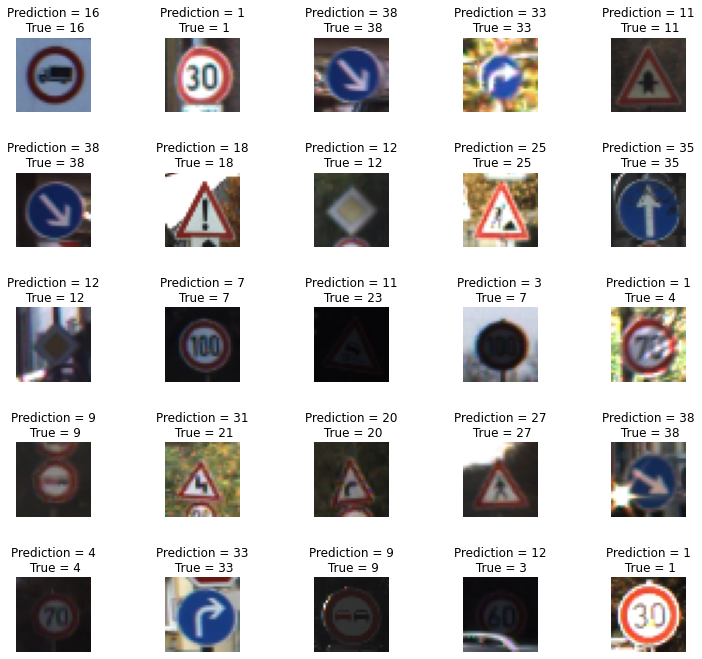

In [98]:
L = 5
W = 5

fig, axes = plt.subplots(L, W, figsize = (12, 12))
axes = axes.ravel()

for i in np.arange(0, L*W):
    axes[i].imshow(x_test[i])
    axes[i].set_title('Prediction = {}\n True = {}'.format(predicted_classes[i], y_true[i]))
    axes[i].axis('off')

plt.subplots_adjust(wspace = 1)    

# APPENDIX

- In this case study, we want to classify images of traffic signs using deep Convolutional Neural Networks (CNNs).
- The dataset consists of 43 different classes of images. 
- Classes are as listed below: 
  - 0 = Speed limit (20km/h) 
  - 1 = Speed limit (30km/h)
  - 2 = Speed limit (50km/h) 
  - 3 = Speed limit (60km/h)
  - 4 = Speed limit (70km/h) 
  - 5 = Speed limit (80km/h)
  - 6 = End of speed limit (80km/h)
  - 7 = Speed limit (100km/h)
  - 8 = Speed limit (120km/h)
  - 9 = No passing
  - 10 = No passing for vehicles over 3.5 metric tons
  - 11 = Right-of-way at the next intersection
  - 12 = Priority road
  - 13 = Yield
  - 14 = Stop
  - 15 = No vehicles
  - 16 = Vehicles over 3.5 metric tons prohibited
  - 17 = No entry
  - 18 = General caution
  - 19 = Dangerous curve to the left
  - 20 = Dangerous curve to the right
  - 21 = Double curve
  - 22 = Bumpy road
  - 23 = Slippery road
  - 24 = Road narrows on the right
  - 25 = Road work
  - 26 = Traffic signals
  - 27 = Pedestrians
  - 28 = Children crossing 
  - 29 = Bicycles crossing
  - 30 = Beware of ice/snow
  - 31 = Wild animals crossing
  - 32 = End of all speed and passing limits
  - 33 = Turn right ahead
  - 34 = Turn left ahead
  - 35 = Ahead only
  - 36 = Go straight or right
  - 37 = Go straight or left
  - 38 = Keep right
  - 39 = Keep left
  - 40 = Roundabout mandatory
  - 41 = End of no passing
  - 42 = End of no passing by vehicles over 3.5 metric tons

- Citation
J. Stallkamp, M. Schlipsing, J. Salmen, and C. Igel. The German Traffic Sign Recognition Benchmark: A multi-class classification competition. In Proceedings of the IEEE International Joint Conference on Neural Networks, pages 1453–1460. 2011. 
@inproceedings{Stallkamp-IJCNN-2011, author = {Johannes Stallkamp and Marc Schlipsing and Jan Salmen and Christian Igel}, booktitle = {IEEE International Joint Conference on Neural Networks}, title = {The {G}erman {T}raffic {S}ign {R}ecognition {B}enchmark: A multi-class classification competition}, year = {2011}, pages = {1453--1460} }